<a href="https://colab.research.google.com/github/naufalgeraldi/FaceRecogSVM-ArtificialIntelligence/blob/main/Penerapan_Algoritma_Support_Vector_Machine_Pada_Pengenalan_Wajah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Library**

In [2]:
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

**Download Dataset**

In [3]:
lfw_people = fetch_lfw_people(min_faces_per_person=50, resize=0.5)

**Pendefinisian properti dataset**

In [4]:
n_samples, h, w = lfw_people.images.shape

**Melihat jumlah pixel yang diperhatikan**

In [6]:

X = lfw_people.data
n_features = X.shape[1]

**Melihat informasi mengenai data yang digunakan**



In [14]:
# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total ukuran dataset:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total ukuran dataset:
n_samples: 1560
n_features: 2914
n_classes: 12


**Membagi sekumpulan data menjadi training set dan test set**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


**Mengubah gambar 2d ke dimensi yang lebih rendah (eigenface)**



In [15]:
n_components = 150

print(
    "Mengekstrak %d eigenfaces dari %d muka" % (n_components, X_train.shape[0])
)
t0 = time()
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Mengubah input data pada orthonormal basis eigenfaces")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

Mengekstrak 150 eigenfaces dari 1170 muka
done in 0.550s
Mengubah input data pada orthonormal basis eigenfaces
done in 0.071s


**Training model klasifikasi svm**

In [12]:
print("Menyocokkan classifier kepada training set")
t0 = time()
param_grid = {
    "C": [1e3, 5e3, 1e4, 5e4, 1e5],
    "gamma": [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
}
clf = GridSearchCV(SVC(kernel="rbf", class_weight="balanced"), param_grid)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Estimasi terbaik yang didapatkan berdasarkan grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
done in 44.623s
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.005)


**Evaluasi hasil prediksi**

In [ ]:
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

done in 0.078s
                   precision    recall  f1-score   support

     Ariel Sharon       0.64      0.56      0.60        16
     Colin Powell       0.78      0.91      0.84        66
  Donald Rumsfeld       0.64      0.78      0.70        27
    George W Bush       0.87      0.81      0.84       140
Gerhard Schroeder       0.64      0.58      0.61        24
      Hugo Chavez       0.92      0.71      0.80        17
   Jacques Chirac       0.78      0.70      0.74        10
    Jean Chretien       0.73      0.79      0.76        14
    John Ashcroft       0.87      0.81      0.84        16
Junichiro Koizumi       0.89      0.73      0.80        11
  Serena Williams       0.75      0.67      0.71         9
       Tony Blair       0.75      0.82      0.79        40

         accuracy                           0.79       390
        macro avg       0.77      0.74      0.75       390
     weighted avg       0.80      0.79      0.79       390

[[  9   2   1   3   0   0   0   1   0 

**Penyajian hasil prediksi dalam bentuk plot gambar**

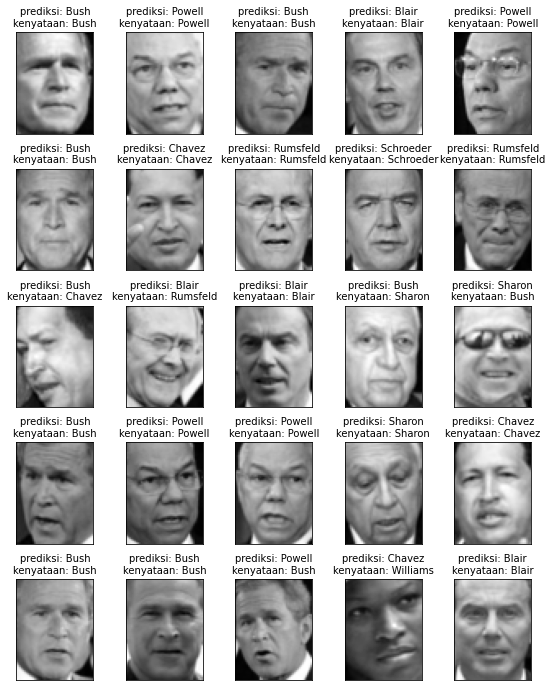

In [ ]:
def plot_gallery(images, titles, h, w, n_row=5, n_col=5):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.5 * n_col, 2.0 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=10)
        plt.xticks(())
        plt.yticks(())

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(" ", 1)[-1]
    true_name = target_names[y_test[i]].rsplit(" ", 1)[-1]
    return "Prediksi: %s\nKenyataan: %s" % (pred_name, true_name)


prediction_titles = [
    title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])
]

plot_gallery(X_test, prediction_titles, h, w)